# Section A - KPI Reporting

### 1) Monthly total loan volume in dollars and the monthly average loan size

In [1]:
import re
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
data = pd.read_csv('LoanStats_2015_subset.csv')

In [3]:
# let's see the months when the loan was issued and the amount of each loan
loan_info = data[["issue_d", "loan_amnt"]].dropna() # dropped all NaN values

In [5]:
def total_loan_each_month(x):
    for month, loan in x.groupby("issue_d"):
        total = np.sum(loan["loan_amnt"])
        print("In " + month + " the total amount of loan was $" + str(total))
        
total_loan_each_month(loan_info)

In Apr-2015 the total amount of loan was $539401075.0
In Aug-2015 the total amount of loan was $555331400.0
In Dec-2015 the total amount of loan was $667910550.0
In Feb-2015 the total amount of loan was $366908525.0
In Jan-2015 the total amount of loan was $533132575.0
In Jul-2015 the total amount of loan was $696238600.0
In Jun-2015 the total amount of loan was $429777175.0
In Mar-2015 the total amount of loan was $390003275.0
In May-2015 the total amount of loan was $483189475.0
In Nov-2015 the total amount of loan was $567247325.0
In Oct-2015 the total amount of loan was $738221400.0
In Sep-2015 the total amount of loan was $450246800.0


We see that the order of the months is not very convenient. 
So we can first place the months in a correct order and print the final report again

In [6]:
# Now let's print the report in a correct order
from pandas.api.types import CategoricalDtype
loan_each_month = loan_info.groupby("issue_d", as_index=False).agg({"loan_amnt":np.sum})
month_order = CategoricalDtype(
    ["Jan-2015", "Feb-2015", "Mar-2015", "Apr-2015","May-2015", "Jun-2015", 
     "Jul-2015", "Aug-2015","Sep-2015", "Oct-2015", "Nov-2015", "Dec-2015"], 
     ordered=True)
loan_each_month["issue_d"] = loan_each_month["issue_d"].astype(month_order)
loan_each_month = loan_each_month.sort_values("issue_d")

for index, row in loan_each_month.iterrows():
        print("In " + str(row['issue_d']) + " the total amount of loan was $" 
              + str(row['loan_amnt']))

In Jan-2015 the total amount of loan was $533132575.0
In Feb-2015 the total amount of loan was $366908525.0
In Mar-2015 the total amount of loan was $390003275.0
In Apr-2015 the total amount of loan was $539401075.0
In May-2015 the total amount of loan was $483189475.0
In Jun-2015 the total amount of loan was $429777175.0
In Jul-2015 the total amount of loan was $696238600.0
In Aug-2015 the total amount of loan was $555331400.0
In Sep-2015 the total amount of loan was $450246800.0
In Oct-2015 the total amount of loan was $738221400.0
In Nov-2015 the total amount of loan was $567247325.0
In Dec-2015 the total amount of loan was $667910550.0


Now we calculate the average amount of loan each month

In [7]:
def average_loan_each_month(x):
    for month, loan in x.groupby("issue_d"):
        average_loan = np.mean(loan["loan_amnt"])
        print("In " + month + " the average amount of loan was $" 
              + str(round(average_loan, 2)))
        
print(average_loan_each_month(loan_info))

In Apr-2015 the average amount of loan was $15225.71
In Aug-2015 the average amount of loan was $15474.88
In Dec-2015 the average amount of loan was $15062.37
In Feb-2015 the average amount of loan was $15435.78
In Jan-2015 the average amount of loan was $15185.93
In Jul-2015 the average amount of loan was $15148.14
In Jun-2015 the average amount of loan was $15087.84
In Mar-2015 the average amount of loan was $15354.46
In May-2015 the average amount of loan was $15140.84
In Nov-2015 the average amount of loan was $15114.5
In Oct-2015 the average amount of loan was $15180.06
In Sep-2015 the average amount of loan was $15720.36
None


In [8]:
# Let's print this in a coorect order
ave_loan_each_month = loan_info.groupby("issue_d", as_index=False).agg({"loan_amnt":np.mean})
ave_loan_each_month["issue_d"] = ave_loan_each_month["issue_d"].astype(month_order)
ave_loan_each_month = ave_loan_each_month.sort_values("issue_d")

for index, row in ave_loan_each_month.iterrows():
        print("In " + str(row['issue_d']) + " the average amount of loan was $" 
              + str(round(row['loan_amnt'], 2)))

In Jan-2015 the average amount of loan was $15185.93
In Feb-2015 the average amount of loan was $15435.78
In Mar-2015 the average amount of loan was $15354.46
In Apr-2015 the average amount of loan was $15225.71
In May-2015 the average amount of loan was $15140.84
In Jun-2015 the average amount of loan was $15087.84
In Jul-2015 the average amount of loan was $15148.14
In Aug-2015 the average amount of loan was $15474.88
In Sep-2015 the average amount of loan was $15720.36
In Oct-2015 the average amount of loan was $15180.06
In Nov-2015 the average amount of loan was $15114.5
In Dec-2015 the average amount of loan was $15062.37


We can also see how much loan people take each month

In [9]:
print("Each month people take on average $" + str(np.average(loan_each_month["loan_amnt"])))

Each month people take on average $534800681.25


### 2) Calculation of charge-off rates by loan grades

Let's first see how many laon grades exist: 

In [10]:
data["grade"].dropna().unique() # checking how many loan grades exist

array(['B', 'A', 'D', 'E', 'C', 'F', 'G'], dtype=object)

So we see that there are 7 different loan grades as: A, B, C, D, E, F, G. We need to calculate charge-off rates for each status separately.  

First we separate the necessary columns by their grade

In [11]:
grade_A = data[data["grade"] == "A"][["grade","loan_status","loan_amnt", "int_rate"]].dropna()
grade_B = data[data["grade"] == "B"][["grade","loan_status","loan_amnt", "int_rate"]].dropna()
grade_C = data[data["grade"] == "C"][["grade","loan_status","loan_amnt", "int_rate"]].dropna()
grade_D = data[data["grade"] == "D"][["grade","loan_status","loan_amnt", "int_rate"]].dropna()
grade_E = data[data["grade"] == "E"][["grade","loan_status","loan_amnt", "int_rate"]].dropna()
grade_F = data[data["grade"] == "F"][["grade","loan_status","loan_amnt", "int_rate"]].dropna()
grade_G = data[data["grade"] == "G"][["grade","loan_status","loan_amnt", "int_rate"]].dropna()

In [12]:
# Let's see how big each loan grade is
print(len(grade_A),len(grade_B),len(grade_C),
      len(grade_D),len(grade_E),len(grade_F),len(grade_G))

73336 117606 120567 62654 34948 9817 2167


Let's see how many loan statuses exist:

In [13]:
data["loan_status"].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'Late (16-30 days)',
       'Late (31-120 days)', 'In Grace Period', 'Default', nan],
      dtype=object)

We need to count only the ones marked as "Charged Off" and "Default" to calculate the charge-off rates. From my understanding we need to calculate the charge-off rates as

$\text{charge-off rate} = \frac{\text{number of charged-off loans}}{\text{total number of loans}}$

As problem states, we will take both "Charge Off" and "Default" values as charged-off, and the
rest as not charged-off

In [14]:
grade_A_charge_off_amount = grade_A.loc[grade_A["loan_status"].isin(["Charged Off","Default"])]["loan_amnt"]
grade_B_charge_off_amount = grade_B.loc[grade_B["loan_status"].isin(["Charged Off","Default"])]["loan_amnt"]
grade_C_charge_off_amount = grade_C.loc[grade_C["loan_status"].isin(["Charged Off","Default"])]["loan_amnt"]
grade_D_charge_off_amount = grade_D.loc[grade_D["loan_status"].isin(["Charged Off","Default"])]["loan_amnt"]
grade_E_charge_off_amount = grade_E.loc[grade_E["loan_status"].isin(["Charged Off","Default"])]["loan_amnt"]
grade_F_charge_off_amount = grade_F.loc[grade_F["loan_status"].isin(["Charged Off","Default"])]["loan_amnt"]
grade_G_charge_off_amount = grade_G.loc[grade_G["loan_status"].isin(["Charged Off","Default"])]["loan_amnt"]

In [15]:
grade_A_charge_off_rate = len(grade_A_charge_off_amount)/len(grade_A["loan_amnt"])
grade_B_charge_off_rate = len(grade_B_charge_off_amount)/len(grade_B["loan_amnt"])
grade_C_charge_off_rate = len(grade_C_charge_off_amount)/len(grade_C["loan_amnt"])
grade_D_charge_off_rate = len(grade_D_charge_off_amount)/len(grade_D["loan_amnt"])
grade_E_charge_off_rate = len(grade_E_charge_off_amount)/len(grade_E["loan_amnt"])
grade_F_charge_off_rate = len(grade_F_charge_off_amount)/len(grade_F["loan_amnt"])
grade_G_charge_off_rate = len(grade_G_charge_off_amount)/len(grade_G["loan_amnt"])

In [16]:
print(
"The charge-off rate for grade-A loan is "+str(round(grade_A_charge_off_rate*100, 2))+"%\n"
"The charge-off rate for grade-B loan is "+str(round(grade_B_charge_off_rate*100, 2))+"%\n"
"The charge-off rate for grade-C loan is "+str(round(grade_C_charge_off_rate*100, 2))+"%\n"
"The charge-off rate for grade-D loan is "+str(round(grade_D_charge_off_rate*100, 2))+"%\n"
"The charge-off rate for grade-E loan is "+str(round(grade_E_charge_off_rate*100, 2))+"%\n"
"The charge-off rate for grade-F loan is "+str(round(grade_F_charge_off_rate*100, 2))+"%\n"
"The charge-off rate for grade-G loan is "+str(round(grade_G_charge_off_rate*100, 2))+"%")

The charge-off rate for grade-A loan is 4.51%
The charge-off rate for grade-B loan is 9.75%
The charge-off rate for grade-C loan is 16.22%
The charge-off rate for grade-D loan is 23.52%
The charge-off rate for grade-E loan is 29.08%
The charge-off rate for grade-F loan is 37.6%
The charge-off rate for grade-G loan is 43.05%


In [17]:
grades = [i for i in range(1,8)]
charge_off_rates = [100*grade_A_charge_off_rate, 100*grade_B_charge_off_rate, 
                    100*grade_C_charge_off_rate, 100*grade_D_charge_off_rate, 
                    100*grade_E_charge_off_rate, 100*grade_F_charge_off_rate,
                    100*grade_G_charge_off_rate]

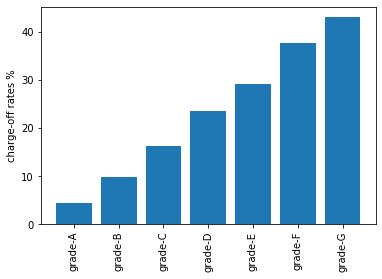

In [18]:
labels = ['grade-A', 'grade-B', 'grade-C', 'grade-D', 'grade-E', 'grade-F', 'grade-G',]
plt.bar(grades, charge_off_rates)
plt.xticks(grades, labels, rotation='vertical')
plt.ylabel("charge-off rates %")
plt.show()

#### Conclusion:
These numbers show the charge-off rates for each grade category. We can see that the 
percentage of charge-off the rates are different for each group. It looks like the charge-off rates for the grade-G borrowers is much higher than those of grade-A. From this we can understand that the people in grade-G tend to not pay back their loan and this leads to higher risk of loss of money. And grade-A group has the lowest percentage of charge-off rates, thus they are more trustable and may qualify to borrow more frequent and bigger amount of loans. 

We can also estimate the amount of money that each category of people may not pay back their loan. It is clear that grade-A category people have lesser chance to be charged-off, but they also may have bigger amount of loans compared to those of grade-G. Similarly, since people of grade-G category have higher risks not to pay back their loan, the amount of loan given to them may also be less. So it might be fair to look at the amount of loan each category borrows and calculate the approximate amount of loss. 

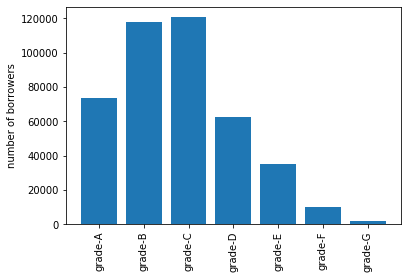

In [19]:
grades = [i for i in range(1,8)]
number_of_borrowers = [len(grade_A),len(grade_B),len(grade_C),
                       len(grade_D),len(grade_E),len(grade_F),len(grade_G)]
labels = ['grade-A', 'grade-B', 'grade-C', 'grade-D', 'grade-E', 'grade-F', 'grade-G',]
plt.bar(grades, number_of_borrowers)
plt.xticks(grades, labels, rotation='vertical')
plt.ylabel("number of borrowers")
plt.show()

We can see that there are not many people in grade-G and grade-F, which have higher
charge-off rates

Now let's see the total amount of loan taken by each group

In [20]:
grade_A_total_loan = np.sum(grade_A_charge_off_amount)
grade_B_total_loan = np.sum(grade_B_charge_off_amount)
grade_C_total_loan = np.sum(grade_C_charge_off_amount)
grade_D_total_loan = np.sum(grade_D_charge_off_amount)
grade_E_total_loan = np.sum(grade_E_charge_off_amount)
grade_F_total_loan = np.sum(grade_F_charge_off_amount)
grade_G_total_loan = np.sum(grade_G_charge_off_amount)

In [21]:
total_loan_by_grade = [grade_A_total_loan, grade_B_total_loan, grade_C_total_loan,
                 grade_D_total_loan, grade_E_total_loan, grade_F_total_loan,
                 grade_G_total_loan]

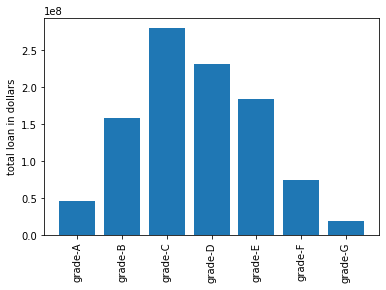

In [22]:
labels = ['grade-A', 'grade-B', 'grade-C', 'grade-D', 'grade-E', 'grade-F', 'grade-G',]
plt.bar(grades, total_loan_by_grade)
plt.xticks(grades, labels, rotation='vertical')
plt.ylabel("total loan in dollars")
plt.show()

As was estimated, the chart above shows that the group of people who have more trust may qualify to borrow larger amount of money, and that's what exactly happens here. Although they have less risks compared to the grade-G borrowers, the amount of money they borrow may still lead to larger loss of money overall. Let's try to reflect this in the following calculation. We will estimate the loss of money for each group using their charge-off rates and the total amount of loan.

In [23]:
estimated_loss_grade_A = grade_A_total_loan*grade_A_charge_off_rate
estimated_loss_grade_B = grade_B_total_loan*grade_B_charge_off_rate
estimated_loss_grade_C = grade_C_total_loan*grade_C_charge_off_rate
estimated_loss_grade_D = grade_D_total_loan*grade_D_charge_off_rate
estimated_loss_grade_E = grade_E_total_loan*grade_E_charge_off_rate
estimated_loss_grade_F = grade_F_total_loan*grade_F_charge_off_rate
estimated_loss_grade_G = grade_G_total_loan*grade_G_charge_off_rate

In [24]:
print(
"Estimated loss of money for grade-A would be $"+str(round(estimated_loss_grade_A, 2))+"\n"
"Estimated loss of money for grade-B would be $"+str(round(estimated_loss_grade_B, 2))+"\n"
"Estimated loss of money for grade-C would be $"+str(round(estimated_loss_grade_C, 2))+"\n"
"Estimated loss of money for grade-D would be $"+str(round(estimated_loss_grade_D, 2))+"\n"
"Estimated loss of money for grade-E would be $"+str(round(estimated_loss_grade_E, 2))+"\n"
"Estimated loss of money for grade-F would be $"+str(round(estimated_loss_grade_F, 2))+"\n"
"Estimated loss of money for grade-G would be $"+str(round(estimated_loss_grade_G, 2))+"\n")

Estimated loss of money for grade-A would be $2095331.87
Estimated loss of money for grade-B would be $15488442.61
Estimated loss of money for grade-C would be $45403156.4
Estimated loss of money for grade-D would be $54492359.97
Estimated loss of money for grade-E would be $53681947.76
Estimated loss of money for grade-F would be $27889355.04
Estimated loss of money for grade-G would be $8073183.99



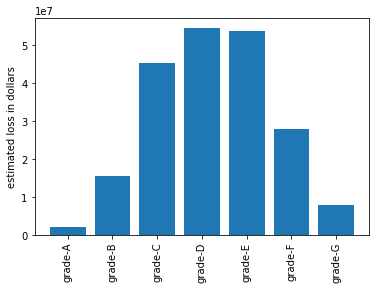

In [25]:
grades = [i for i in range(1,8)]
money_losses = [estimated_loss_grade_A, estimated_loss_grade_B, estimated_loss_grade_C, 
                estimated_loss_grade_D, estimated_loss_grade_E, estimated_loss_grade_F,
                estimated_loss_grade_G]
labels = ['grade-A', 'grade-B', 'grade-C', 'grade-D', 'grade-E', 'grade-F', 'grade-G',]
plt.bar(grades, money_losses)
plt.xticks(grades, labels, rotation='vertical')
plt.ylabel("estimated loss in dollars")
plt.show()

As we can clearly see, the chart above shows that the estimated amount of loss due to 
the charge-off can be determined by two parameters: charge-off rate and the amount of loan. People in grade-A have low charge-off rates and the total amount of loan is also not very big (there are simply few people in this category). People in grade-G have very high charge-off rate, but they cannot borrow too much money and the total amount of loss is also low. The main amount of loss of money falls in category of grade-C, grade-D and grade-E. 

### 4) Interest rate for the risk

In [26]:
grade_groups = data[["grade","loan_status","loan_amnt", "int_rate"]].dropna()
grade_groups["int_rate"] = grade_groups["int_rate"].str[:-1].astype(float)
average_interest_rate_by_grade = grade_groups.groupby("grade").agg({"int_rate":np.nanmean})

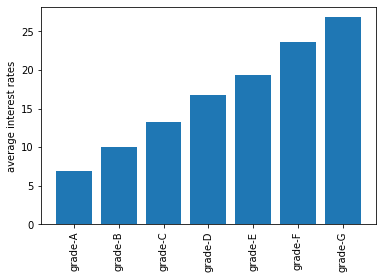

In [27]:
grades = [i for i in range(1,8)]
average_rates = np.round(average_interest_rate_by_grade["int_rate"].tolist(), 2)
labels = ['grade-A', 'grade-B', 'grade-C', 'grade-D', 'grade-E', 'grade-F', 'grade-G',]
plt.bar(grades, average_rates)
plt.xticks(grades, labels, rotation='vertical')
plt.ylabel("average interest rates")
plt.show()

This chart shows that the average amount of loan interest rate for each category of borrowers has a direct relation with the amount of risk. The two charts that show the charge-off rate and the average loan rate have a very similar structure, and show that these two parameters are correlated with each other. 

# Section B - Modeling

### 1) Data cleaning

In [28]:
print("Number of raws: " + str(len(data)) + 
      "\nNumber of columns: " + str(len(data.columns)))

Number of raws: 421097
Number of columns: 105


The full data is consist of 421097 rows and 105 columns. First we may try to delete any rows or columns where all elements are NaN or null. If we apply $\textbf{"data.dropna()}$" we  can see that the whole data vanishes, which means that every row has at least one NaN value. If we apply $\textbf{"len(data.dropna(how='all'))}$" we see that the size of the data remains the same as there is no row with all elements missing. If we apply $\textbf{"len(data.dropna(how='all', axis='columns').columns)"}$ we can see that the number of columns has shrinked from 105 to 93, which means that there are 12 columns that have no data at all and we may just drop those columns from our dataset. Furthermore, we may set our threshold for the number of non-missing data, such as 5000 or so. In other words, we may say that we don't want to work with any data that has less than 5000 nonzero values. For that we can apply $\textbf{"data.dropna(thresh=len(data)-5000, axis='columns')"}$, and the size of the data after this shrinks down to 65, which means that we have only 65 columns whose nonzero elements are more than 5000, and we may want to use these data only for fruther analysis and
machine learning modeling.

In [30]:
print("Number of columns remaining after dropping all-zero columns:",
      len(data.dropna(how='all', axis='columns').columns))
print("Number of columns remaining after dropping columns with threshold:", 
      len(data.dropna(thresh=len(data)-5000, axis='columns').columns))

Number of columns remaining after dropping all-zero columns: 93
Number of columns remaining after dropping columns with threshold: 65


In [35]:
reduced_data = data.dropna(thresh=len(data)-5000, axis='columns')
print(len(reduced_data))

421097


Now that we have eliminated the columns that have too many NaN values, we might as well be
interested if the rest of the data has many zeros. For that we can call:

In [36]:
print("Number of zeros in each column would be:")
print(reduced_data.isnull().sum().head())
print("Maximum number of zeros is: ", max(reduced_data.isnull().sum()))

Number of zeros in each column would be:
acc_now_delinq          2
acc_open_past_24mths    2
addr_state              2
annual_inc              2
application_type        2
dtype: int64
Maximum number of zeros is:  4241


We see that every column has several null values, and the maximum number of zeros is only 
4241, which belongs to column "percent_bc_gt_75". We can also eliminate this data because it makes a very small portion of the data in hand. For that we can call:

In [37]:
reduced_data = reduced_data.dropna()
print(len(reduced_data))

416460


We see that we still have most of the data preserved and this might be a good set of data to
use for further analysis. We conclude that the original data had some columns with all of their values being completely missing or zero, so we dropped those columns. Moreover, from the remaining columns we see that there is still some missing data but those data make a very small part of the original data and we droppped those values as well and preserved most of the data in our hand.

In [38]:
print(reduced_data.info())
print(reduced_data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416460 entries, 0 to 421094
Data columns (total 65 columns):
acc_now_delinq                416460 non-null float64
acc_open_past_24mths          416460 non-null float64
addr_state                    416460 non-null object
annual_inc                    416460 non-null float64
application_type              416460 non-null object
avg_cur_bal                   416460 non-null float64
bc_open_to_buy                416460 non-null float64
bc_util                       416460 non-null float64
chargeoff_within_12_mths      416460 non-null float64
collections_12_mths_ex_med    416460 non-null float64
delinq_2yrs                   416460 non-null float64
delinq_amnt                   416460 non-null float64
dti                           416460 non-null float64
earliest_cr_line              416460 non-null object
funded_amnt                   416460 non-null float64
funded_amnt_inv               416460 non-null float64
grade                       

After all this process we see that the final data is more or less clean now. The missing data was not random and we could eliminate those values easily. Some attributed were missing more than the others as we saw above and through couple of data cleaning process we were able to eliminate those values as well. This is just a short and approximate way of cleaning data from many meanigless parameters. We could spend more time and effort in order to reach better results, but I believe for  the purpose of this task this process might be enough to give us some idea about the structure of our data. 

### 2) Building Model

Before building a model to predict charge-off rates, we might want to take a look at the data again and eliminate any data which might be irrelevant to calculate the charge-off rates.

In [53]:
reduced_data.iloc[:, 55:65]   # we can change the range of columns 
                            # and eventually see all the columns

,title,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,verification_status,zip_code
0,Debt consolidation,181540.0,291626.0,37.0,74787.0,49500.0,105910.0,73200.0,Not Verified,660xx
1,Credit card refinancing,430856.0,512381.0,18.0,44786.0,44000.0,51081.0,45500.0,Not Verified,054xx
2,Debt consolidation,193745.0,267312.0,46.0,57302.0,58500.0,31758.0,83600.0,Verified,471xx
3,Home improvement,408118.0,447599.0,23.0,152571.0,43400.0,146568.0,43400.0,Not Verified,430xx
5,Debt consolidation,42952.0,92909.0,31.0,42952.0,33200.0,37909.0,55000.0,Source Verified,441xx
...,...,...,...,...,...,...,...,...,...,...
421090,Home improvement,140285.0,152650.0,23.0,8621.0,9000.0,0.0,10200.0,Verified,072xx
421091,Debt consolidation,25274.0,32950.0,15.0,25274.0,9200.0,15850.0,17100.0,Verified,905xx
421092,Debt consolidation,58418.0,96919.0,20.0,58418.0,9700.0,69919.0,27000.0,Source Verified,010xx
421093,Debt consolidation,34178.0,51239.0,22.0,34178.0,10600.0,33239.0,18000.0,Verified,378xx


After careful review of the columns, I decided to use the following features:
"annual_inc", "avg_cur_bal", "chargeoff_within_12_mths", "delinq_2yrs", "dti", 
"funded_amnt_inv", "grade", "installment", "loan_amnt","loan_status",  "num_accts_ever_120_pd", "num_bc_sats", "num_sats", "open_acc", "pct_tl_nvr_dlq", 
"pub_rec_bankruptcies", "revol_bal", "tot_cur_bal". I investigated each column by printing
their unique and nonzero values, and decided to have these parameters as the features to 
predict the charge-off rates. We will split our data into ~ 80%-20% as the training and
the testing parts and see if we were able to find the same labels for the loan status.

Since I counted "Charge-off" and "Default" as the charge-off and the rest as non-charge-off, 
as a simplified model I will rename the loan status as "charge-off == 1" and "non-charge-off == 0", and we can use a logistic regression to predict the charge-off rates. 

So now we select the the above columns and create our data set that we are going to use
create a machine learning model.

In [67]:
features = reduced_data[["annual_inc", "avg_cur_bal", "chargeoff_within_12_mths", 
                         "delinq_2yrs", "dti", "funded_amnt_inv", "installment", "loan_amnt", 
                         "num_accts_ever_120_pd", "num_bc_sats", "num_sats", "open_acc", 
                         "pct_tl_nvr_dlq", "pub_rec_bankruptcies", "revol_bal", "tot_cur_bal"]]





labels = reduced_data["loan_status"].replace({'Fully Paid': 0, 'Current': 0, 
                                              'Charged Off': 1, 'Late (16-30 days)': 0,
                                             'Late (31-120 days)': 0, 'In Grace Period': 0,
                                             'Default': 1})
print(features.dtypes)
print(labels.dtype)

annual_inc                  float64
avg_cur_bal                 float64
chargeoff_within_12_mths    float64
delinq_2yrs                 float64
dti                         float64
funded_amnt_inv             float64
installment                 float64
loan_amnt                   float64
num_accts_ever_120_pd       float64
num_bc_sats                 float64
num_sats                    float64
open_acc                    float64
pct_tl_nvr_dlq              float64
pub_rec_bankruptcies        float64
revol_bal                   float64
tot_cur_bal                 float64
dtype: object
int64


"annual_inc" - annual income is definitely one of the features that tell if a person is capable of paying back his/her loan

"avg_cur_bal" - average current balance in a person's account also tell if the person is capable of paying everything back. If this balance is too big, it increases the risk of being charged-off

"chargeoff_within_12_mths" - the number of charged-off cases within the last 12 months will also tell if a person is going to be charged-off in the future. Same thing can be said about "delinq_2yrs"


"installment" - the monthly payment owed by the borrower if the loan originated. This tells the amount of loan a borrower should pay every month. If this amount is too big, a person may not be able to pay it in full.

"loan_amnt" - amount of loan is definitely the number we should be looking for to calculate the chances of being charged-off

"num_bc_sats", "num_sats" - number of satisfactory accounts. This also tells us the history of the bank accounts that were fully paid or not.

"pub_rec_bankruptcies" - tells us if a borrower has been bankrupt in the past and should be relevant to calculate the future risks

"revol_bal", "tot_cur_bal" - revolving and current total balances in all accounts tell us how much the borrower owes to the bank, which can also increase the chance of being charged off

In [68]:
features

,annual_inc,avg_cur_bal,chargeoff_within_12_mths,delinq_2yrs,dti,funded_amnt_inv,installment,loan_amnt,num_accts_ever_120_pd,num_bc_sats,num_sats,open_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,revol_bal,tot_cur_bal
0,65000.0,10086.0,0.0,0.0,23.84,12000.0,253.79,12000.0,0.0,5.0,18.0,18.0,100.0,0.0,9786.0,181540.0
1,150000.0,61551.0,0.0,0.0,9.54,25000.0,752.87,25000.0,0.0,3.0,7.0,7.0,100.0,0.0,19339.0,430856.0
2,75000.0,7176.0,0.0,0.0,31.88,28000.0,718.51,28000.0,0.0,14.0,27.0,27.0,100.0,0.0,43413.0,193745.0
3,175000.0,51015.0,0.0,0.0,18.50,30000.0,1051.31,30000.0,0.0,3.0,9.0,9.0,95.7,0.0,21831.0,408118.0
5,104000.0,3068.0,0.0,0.0,14.01,33600.0,1096.53,33600.0,1.0,6.0,14.0,14.0,96.8,0.0,28475.0,42952.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421090,79000.0,35071.0,0.0,0.0,3.90,24000.0,797.03,24000.0,10.0,3.0,5.0,5.0,56.5,0.0,8621.0,140285.0
421091,31000.0,3159.0,0.0,0.0,28.69,10000.0,332.10,10000.0,0.0,3.0,9.0,9.0,100.0,0.0,14037.0,25274.0
421092,64400.0,3895.0,0.0,1.0,27.19,12000.0,317.86,12000.0,1.0,7.0,17.0,17.0,95.0,0.0,8254.0,58418.0
421093,35000.0,3798.0,0.0,0.0,30.90,13000.0,316.07,13000.0,0.0,4.0,9.0,9.0,100.0,1.0,11031.0,34178.0


Since every feature of this data ranges between different numbers, we need to normalize each feature, and make them take values between 0 and 1, so that when we feed our data to the machine learning algorithm no specific data will dominate and every feature will contribute equally. For that we can do:

In [69]:
from sklearn import preprocessing

In [70]:
x = features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x) #normalized data
norm_features = pd.DataFrame(x_scaled, columns=features.columns) #normalized dataframe

In [71]:
norm_features # check the numbers

,annual_inc,avg_cur_bal,chargeoff_within_12_mths,delinq_2yrs,dti,funded_amnt_inv,installment,loan_amnt,num_accts_ever_120_pd,num_bc_sats,num_sats,open_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,revol_bal,tot_cur_bal
0,0.006717,0.018143,0.0,0.000000,0.023864,0.325513,0.167508,0.323529,0.000000,0.079365,0.191011,0.191011,1.000,0.000000,0.003369,0.040819
1,0.015665,0.110718,0.0,0.000000,0.009550,0.706745,0.516162,0.705882,0.000000,0.047619,0.067416,0.067416,1.000,0.000000,0.006658,0.096878
2,0.007769,0.012908,0.0,0.000000,0.031912,0.794721,0.492158,0.794118,0.000000,0.222222,0.292135,0.292135,1.000,0.000000,0.014945,0.043564
3,0.018297,0.091766,0.0,0.000000,0.018519,0.853372,0.724650,0.852941,0.000000,0.047619,0.089888,0.089888,0.957,0.000000,0.007515,0.091766
4,0.010822,0.005519,0.0,0.000000,0.014024,0.958944,0.756240,0.958824,0.025641,0.095238,0.146067,0.146067,0.968,0.000000,0.009803,0.009658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416455,0.008191,0.063086,0.0,0.000000,0.003904,0.677419,0.547012,0.676471,0.256410,0.047619,0.044944,0.044944,0.565,0.000000,0.002968,0.031543
416456,0.003137,0.005682,0.0,0.000000,0.028719,0.266862,0.222215,0.264706,0.000000,0.047619,0.089888,0.089888,1.000,0.000000,0.004832,0.005683
416457,0.006653,0.007006,0.0,0.025641,0.027217,0.325513,0.212267,0.323529,0.025641,0.111111,0.179775,0.179775,0.950,0.000000,0.002841,0.013135
416458,0.003558,0.006832,0.0,0.000000,0.030931,0.354839,0.211017,0.352941,0.000000,0.063492,0.089888,0.089888,1.000,0.090909,0.003797,0.007685


Now we need to split our data into training and testing parts as ~80% and ~20% respectively:

In [72]:
X_train = x_scaled[ :330000,:] # 330 000 by 16 matrix
Y_train = labels[ :330000] # 330 000 elements
X_test = x_scaled[330000: ,:] # 86460 by 16 matrix
Y_test = labels[330000:] # 86460 elements

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [74]:
classifier = LogisticRegression(random_state=0).fit(X_train, Y_train)
Y_predict = classifier.predict(X_test)
print("Predicted outcomes of the test data: ", Y_predict)

Predicted outcomes of the test data:  [0 0 0 ... 0 0 0]


In [75]:
accuracy = accuracy_score(Y_test, Y_predict)
print("The accuracy of our prediction is: ", round(accuracy*100, 2), "%")

The accuracy of our prediction is:  83.21 %


Accuracy of our prediction for a certain loan to be charged-off was found to be 83.2%,
which is not too bad, but still needs some improvement. I believe there could be several
issues we might address in order to increase the accuracy of our prediction.
Firstly, we did not include all the features given to us. Since I do not have a degree in finance, I could not understand some of the features, i. e. I could not see and justify how those features might be reflected in calculating the charge-off, hence I did not include all of them. Secondly, I could spend more time on preprocessing data and trying to find all possible inconsistencies in the data provided to us. This extra steps probably would give us better data and more accurate results. 

# Section C

### Logistic Regression Explained to mathematician:

Logistic Regression is a part of supervised machine learning where we need to train our system based on the data given in order to predict the discrete outcomes of the new data. From statistical point of view it is important to have all our data, whether it is the train data or the test data, to be from the same statistical sample. Logistic Regression is needed when we want to predict an outcome that has a discrete value, such as classification limited number of figures. Let's say we have a collection of labeled examples $\{(x_i, y_i)\}_{i=1}^N$, where N is the size of the collection, $x_i$ is the $D$-dimensional feature vector of example $i = 1, 2, ..., N $,  $y_i$ is the real valued target that has a discrete value of 0 or 1, and every freature $x_i^{(j)}, j = 1,...,D$ is also a real number. 

We want to build a model with hypothesis $h_{\theta}(x)$ such that the outcome is either 0 or 1. We can do so by constructing a linear combination of features of examples under the sigmoid function (logistic function) as:

$h_{\theta}(x_i) = g(\theta^T x_i) = \frac{1}{1 + e^{-\theta^T x_i}}$

where:

$\theta^T x_i = \sum_{j=1}^D \theta^{(j)} x_i^{(j)}$

This is a hypothesis that predicts the outcome of one specific example. Here $h_{\theta}(x_{i})$ is the prediction of each example based on the features of $x_{i}$, $\theta^{(j)}$ represents the collection of parameters, or weights, for each feature of $x_i$. The sigmoid function has such features so that when we are far from the zero point for $\theta^T x_i$ it takes values either 0 or 1, which is a good function for logical operations. Our goal now is to make this prediction to be as close as possible to the real value $y_i$. One way we can approach this problem is to calculate the likelihood of a certain outcome. 

Now, let's assume that:

$P(y = 1| x; \theta) = h_{\theta}(x)$

$P(y = 0| x; \theta) = 1-h_{\theta}(x)$

so that in a more compact form this can be written as:

$P(y | x; \theta) = (h_{\theta}(x))^y (1 - h_{\theta}(x))^{1-y}$

The total likelihood of a certain outcome is the multiplication of probabilities of all the independent outcomes (here we assume that every data is independent from each other):
    
$L(\theta) = \prod_{i=1}^N P(y_{i} | x_i; \theta) = \prod_{i=1}^N (h_{\theta}(x_i))^{y_i} (1 - h_{\theta}(x_i))^{1-y_i}$

Since this is going to give us either too large or too small values, it would be convenient to
work with the logarithm of this function as:
    
$l(\theta) = log(L(\theta)) = \sum_{i=1}^N y_i log(h_{\theta}(x_i)) + (1 - y_i) log(1 - h_{\theta}(x_i))$

and we want to maximize this likelihood. 

Our goal is to find such $\theta_i^{(j)}$ to make this likelihood as big as possible. We can start this by with some initial guess for $\theta_i$, and then repeatedly changes $\theta$ to make $l(\theta)$ larger, until hopefully we converge to a value of $\theta$ that mazimizes $l(\theta)$. Specifically, let’s consider the gradient descent algorithm, which starts with some initial $\theta$, and repeatedly performs the update:

$\theta^{(j)} := \theta^{(j)} + \alpha \frac{\partial}{\partial \theta^{(j)}} l(\theta^{(j)})$

where $\alpha$ is named as a learning rate or a step parameter that we take when updating $\theta_i^{(j)}$.

The derivative gives:

$\frac{\partial}{\partial \theta^{(j)}} l(\theta^{(j)}) = \sum_{i = 1}^N (y_{i} - h_{\theta}(x_{i}))x_i^{(j)}$

where we used $g'(z) = g(z)(1 - g(z))$. The parameters will be updated as:
    
$\theta^{(j)} := \theta^{(j)} - \alpha \sum_{i=1}^N (h_{\theta}(x_{i}) - y_{i})x_i^{(j)}$

Everytime when we run this step we update the parameters $\theta^{(j)}$ 
towards maximizing the likelihood $l(\theta)$. As we approach the maximum point of 
$l(\theta)$ in a hyperparameter space, our steps become smaller and smaller, and eventually we might reach the point where we make almost no progress. So the iteration might be set to stop
when our steps are not significant and further calculation of $\theta$ does not improve it,
and we might stop at this point and return the value of $\theta$. The final value of $\theta$
will be the one that we will use to predict the outcome of new data.

The above algorithm can be written in a vectorized form so that we can update all the 
$\theta^{(j)}$ at the same time:

$\theta := \theta - \alpha X^T (h_{\theta}(X) - Y) $

This process need to be repeated until we reach the point where $\theta$ does not change 
at all or changes negligibly small. This can be achieved by putting a restriction on the number of iterations by telling the computer to stop the calculation if the correction steps do not pass certain threshold. 

### Explanation to non-expert:

Logistic regression is a statistical method for analysing a dataset in which there are one or more independent variables that determine the outcome. The outcome is expected to have binary values such as 1 or 0, Yes or No, True or False, based a set of independent variables. Logistic regression as a special case of linear regression when the outcome variable is categorical. Unlike actual regression, logistic regression does not try to predict the value of a numeric variable given a set of inputs. Instead, the output is a probability that the given input point belongs to a certain class. Even if there are several classes, not only two, each class can be assigned a logical True or False values depending on whether you find it or not. Thus any task with expected discrete outcome can be designed in a logical regression style. For example, you may want to categorize pictures of animals such as dog, cat, bird or fish. Each animal may be assigned a value of 1 (exist) or 0 (does not exist). We may create a vector of animals and organize them in a certain order like (dog, cat, bird, fish) and assign a vector with values (0, 0, 1, 0) if wee see a picture of a bird, or (0, 1, 0, 0) if we see a piture of a cat. Thus any problem that needs a discrete categorization may be designed to fit the logical regression problem. Unlike actual regression, logistic regression expects an outcome as 0 and 1, and for that we can use a special function named sigmoid function $g(x) = \frac{1}{1 + e^{-x}}$ which has the following graphical view:

In [49]:
x = np.linspace(-10, 10, 100)
g = 1/(1+np.exp(-x))

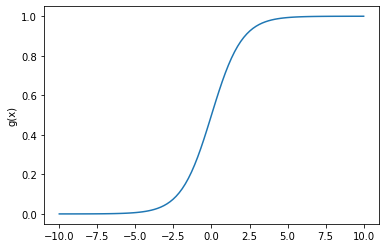

In [50]:
plt.plot(x, g)
plt.ylabel("g(x)")
plt.show()

which shows that when $x < 0$ the outcome is more like to be 0, and when $x > 0$ 
the outcome is more likely to be 1. 

This works good for most of the task we face, and maybe in some occasions we may want 
to use some other other logical functions such as ReLU or so. 

The following function works very well for logical regression problem:
    
$l(\theta) = y log(h_{\theta}(x)) + (1 - y) log(1 - h_{\theta}(x))$

This equation can be understood intuitively as follows: if $y = 0$, then the first term vanishes and  the second term will give  $log(1 - h_{\theta}(x))$. This term is expected to be maximum,  which corresponds to $h_{\theta}(x)$ being close to zero, the result we desire to achieve. But if $y = 1$, then the second term vanishes and the first term will give $log(h_{\theta}(x))$, which can to be maximum if $h_{\theta}(x)$ tends to be 1. Remember that $h_{\theta}(x)$ has values between 0 and 1, that is $0 < h_{\theta}(x) < 1$.

Our goal is that we want to maximize the likelihood function $l(\theta)$. For this we need to tune the parameter $\theta$ and this can be done by iterative calculation of $\theta$. We initially guess $\theta$ by assigning it some random value, then we slowly iterate our algorithm and update the values of $\theta$ until we reach the point where the values of $\theta$ do not change and then we stop. After all this iterative calculation we will obtain a final value for $\theta$. Once we find it, we can use its value to calculate the outcome
of a new data as $h_{\theta}(x)$. Of course this will not give us an exact number as 0 or 1. In fact it will give a number somewhere between 0 and 1, but we take its closest integer value. This is the way we can construct a machine which can categorize objects according to their parameters.